Python 버전 확인

In [1]:
!python --version

Python 3.7.12


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.1.2'

이미지 다운로드

In [3]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2021-12-14 20:23:13--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2021-12-14 20:23:13 (26.8 MB/s) - ‘iWGMlJR.png’ saved [491/491]



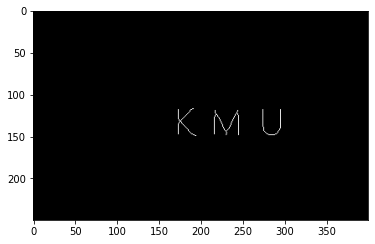

In [4]:
img = cv2.imread('sample.png')

# image 출력
plt.imshow(img)
plt.show()

## 4연결성과 8연결성 라벨링 출력 예시
### 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
### 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 4연결성 라벨링

- 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링
- 연결된 픽셀은 같은 숫자 또는 같은 색을 가짐

In [7]:
def four_connect(img):
  def flood_fill(img, i, j, label):
    if img[i][j][0] == img[i][j][1] == img[i][j][2] == 255:
      img[i][j] = label
      flood_fill(img, i-1, j, label)  # N
      flood_fill(img, i, j+1, label)  # E
      flood_fill(img, i+1, j, label)  # S
      flood_fill(img, i, j-1, label)  # W

  height, width, channel = img.shape
  # 함수 작성
  for i in range(1, height-1):
    for j in range(1, width-1):
      if img[i][j][0] == img[i][j][1] == img[i][j][2] == 255:
        label = np.array([np.random.randint(255), np.random.randint(255), np.random.randint(255)])
        flood_fill(img, i, j, label)

  return img

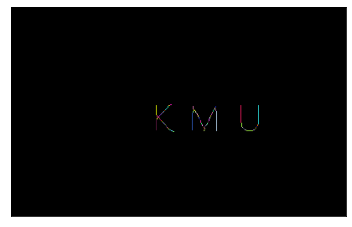

In [8]:
img = cv2.imread('sample.png')

labeled_img = four_connect(img)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

# 8연결성 라벨링
- 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링
- 연결된 픽셀은 같은 숫자 또는 같은 색을 가짐

In [11]:
def eight_connect(img):
  def flood_fill(img, i, j, label):
    if img[i][j][0] == img[i][j][1] == img[i][j][2] == 255:
      img[i][j] = label
      for x in range(-1, 2):
        for y in range(-1, 2):
          flood_fill(img, i+x, j+y, label) # N, NW, NE, E, S, SW, SE, W

  height, width, channel = img.shape
  # 함수 작성
  for i in range(1, height-1):
    for j in range(1, width-1):
      if img[i][j][0] == img[i][j][1] == img[i][j][2] == 255:
        label = np.array([np.random.randint(255), np.random.randint(255), np.random.randint(255)])
        flood_fill(img, i, j, label)

  return img

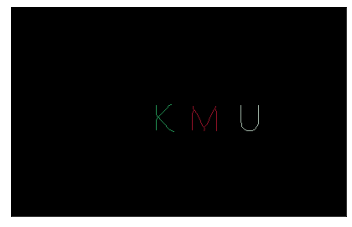

In [12]:
img = cv2.imread('sample.png')

labeled_img = eight_connect(img)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()